<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px; width: 180px">
            <img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo">
        </td>
        <td style="width: 100%">
            <div style="width: 100%; text-align:right"><font style="font-size:38px"><b>Softwaredesign</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b></b></font></div>
        </td>
    </tr>
</table>

---

# matplotlib - Daten visuell darstellen
----

numpy und die Bibliothek matplotlib werden häufig in Kombination verwendet. numpy übernimmt dabei meist den Datenimport (ggf. auch die Bibliothek pandas) und die Datenverarbeitung. Die verarbeiteten Daten sollen aber meist in irgendeiner Form dargestellt werden. Diese Darstellung wird in diesem Notebook mit matplotlib gemacht (alternative dazu wäre auch wieder die Biblithek pandas, welche aber auch indirekt auf matplotlib zugreift).

Im Studium wird es sehr oft notwendig sein Daten in irgendeiner Form darzustellen. In vielen Laboren, Projekten und Seminaren werden Experimente durchgeführt oder in irgend einer Form Daten erhoben. Diese Daten werden verarbeitet und analysiert um dann Ergebnisse zu präsentieren, eine Conclusion zu formulieren oder auch einfach um die Daten besser sichtbar zu machen. Beispiele hierfür gehen von Box- und Scatterplots über klassische Bar- und Pie-Charts bis hin zu einfachen Punkt- oder auch Liniendiagrammen.

---

Im ersten Schritt importieren wir numpy und matplotlib

In [74]:
# Es werden weitere Bibliotheken wie numpy und matplotlib importiert
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Sobald das geschehen ist können wir die Funktionalitäten der Bibliothek nach und nach entdecken. In Anlehnung an die offizielle Dokumentation von matplotlib (https://matplotlib.org/stable/index.html) wurde auch dieses Notebook im speziellen für diese Lehrveranstaltung adaptiert und beginnt damit figures, subfigures und axes

## 1. figures, subfigures und axes

In der Bibliothek matplotlib wird mit `figures` und `subfigures` gearbeitet um Graphen entsprechend darstellen zu können. Dabei können `figures` und `subfigures` als Behälter gesehen werden die eine bestimmte Anzahl an Achsen (`axis`) beinhaltet. Die Anzahl der Achsen hängt dabei von der Art des plots ab. Ein Liniendiagramm besteht klassischerweise aus zwei Achsen (x-y Achsen), aber plots in polarer Darstellungsform ($\theta$-r Achsen) haben zwar auch zwei Achsen, werden aber völlig anders dargestellt. Plots von drei Achsen sind auch möglich wenn es um dreidimensionale Darstellungen geht (x-y-z Achsen). Oft ist es am einfachsten mit offensichtlichsten zu beginnen. Dies wäre vermutlich ein klassisches Liniendiagramm. 

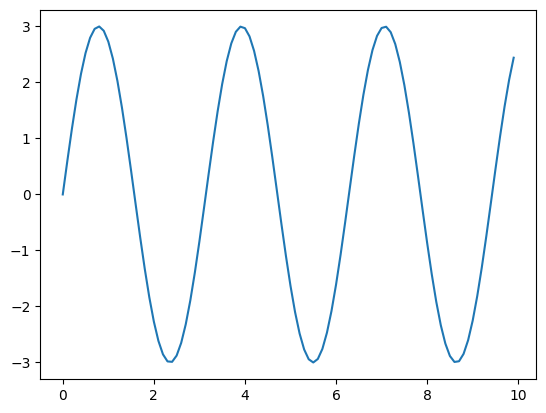

In [75]:
time = np.arange(0,10,0.1)      # Ein numpy array wird erzeugt von 0 bis 10 mit der Schrittweite 0.1
y = 3*np.sin(2*time)            # Ein Sinus mit der Amplitude 3 und einer Kreisfrequenz von 2 wird errechnet

fig, ax = plt.subplots()        # Über subplots wird eine Figure erstellt und ein Achsen-Objekt
ax.plot(time, y)                # Auf diese Achsen Objekt können nun auch Daten geplottet werden

Die gerade gezeigte Schreibweise um einen plot zu erstellen ist nicht alternativlos. Eine weiter Variante wäre das erstellen des Plot mit `plt.plot`. Hierbei wird das Anlegen der Figure und der Achsen von der `plot()`-Funktion übernommen. 

Im Gegenzug haben wir die beiden Objekte nun nicht in den Variablen `fig` und `ax` gespeichert, wenn wir darauf zugreifen wollen. Unsere Information über den Plot, an dem wir gerade arbeiten, speichern wir hingegen in `plt` (`matplotlib.pyplot`) und können dann so auch die Achsen und die Figure verändern.

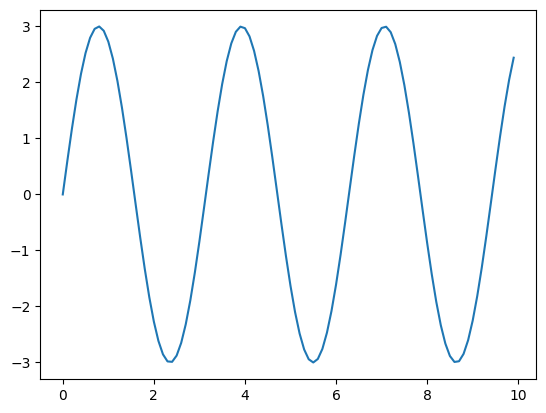

In [76]:
plt.plot(time,y)

## 2. Die Details eines Plots

Wie so oft bei Python und dessen Bibliotheken gibt es eine ganze Reihe an verschiedenen Möglichkeiten die Bibliothek und dessen Funktionalität zu nutzen. Um einen Überblick zu bekommen werden die Details eines Plots anhand der folgenden Graphik erklärt. (https://matplotlib.org/stable/_images/anatomy.png)
<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="image info" />

In der Graphik sind alle sogenannten [Artists](https://matplotlib.org/stable/api/artist_api.html) zu sehen. Artists sind dabei Objekte die zu dem plot gehören und ihm in irgend einer Art und Weise sein Erscheinungsbild geben. Wichtig ist an dieser Stelle nur, dass jeder artist entsprechend verändert und an die Bedürfnisse der Visualisierung angepasst werden können. Dabei ist der Vielfalt fast keine Grenzen gesetzt, wie unter https://matplotlib.org/stable/gallery/index.html zu sehen ist.

### 2.1 Text in den Plots

Fast immer ist es so, dass eine gute Graphik textuelle Bezeichnungen benötigt um aussagekräftig zu sein. Achsbeschriftungen sind hierzu ein gutes Beispiel. Wenn es darum geht die Temperatur über die Zeit darzustellen macht es Sinn die Achsen auch dementsprechend zu bezeichnen. In diesem Fall ist es üblich dies mit den Symbolen und den jeweiligen Einheiten zu tun, ergo $T / \text{°C}$ und $t / \text{s}$. Dabei steht der Bruchstrich tatsächlich für die mathematische Operation. Eine Temperatur dividiert durch die Einheit °C ist eine einheiten-lose Zahl, welche dann auch auf der Achse so dargestellt werden kann. Formal gesehen ist dies entscheidend. Ohne das $/ \text{°C}$ in der Bezeichnung, würden eben keine Zahlen auf der Achse aufgetragen werden, sondern Zahlen **und** die Einheit $\text{°C}$. 

Bei mehreren Linien im Liniendiagramm macht es oft Sinn eine Legende einzufügen. Dies ist durch `plt.legend()` möglich. 

Um losen Text in das Diagramm zu integrieren kann hingegen die Funktion `plt.text()` verwendet werden.

Text(0, -3, 'Hallo Welt')

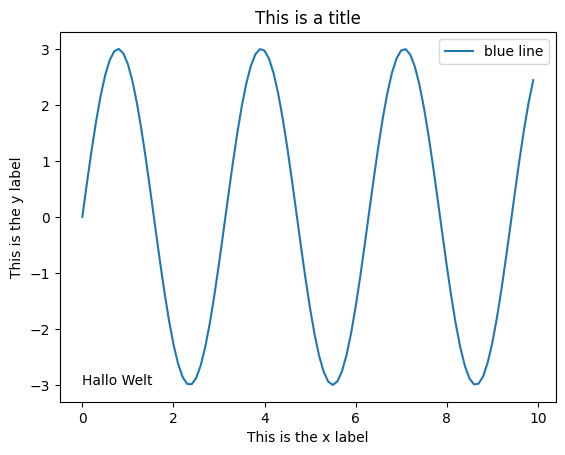

In [77]:
# Plottet die Daten
plt.plot(time,y)

# Integriert einen Titel
plt.title("This is a title")

# Integriert eine Bezeichnung der x-Achse
plt.xlabel("This is the x label")

# Integriert eine Bezeichnung der y-Achse
plt.ylabel("This is the y label")

# Integriert die Legende
plt.legend(['blue line'])

# Integriert Text and der angegebenen Stelle
plt.text(0,-3,"Hallo Welt")

### 2.2 Achsen, Ticks, und Grids 

Eine Graphik muss lesbar sein. Dies kann durch das anpassen des Rahmens der Graphik unterstützt werden. Dabei können Achsen verschiedene Eigenschaften haben und annehmen um den Inhalt der Graphik maximal verständlich zu machen. Im ersten Schritt ist es oft einfach, wenn man ein Gitter in die Graphik einfügt. Die wäre durch den Befehl `plt.grid()` möglich.

---

Natürlich ist es auch möglich direkt auf die Achsen und deren Erscheinung zuzugreifen. Dabei können Schriftgröße, Farbe, major und minor Ticks und noch vieles mehr angepasst werden.

---

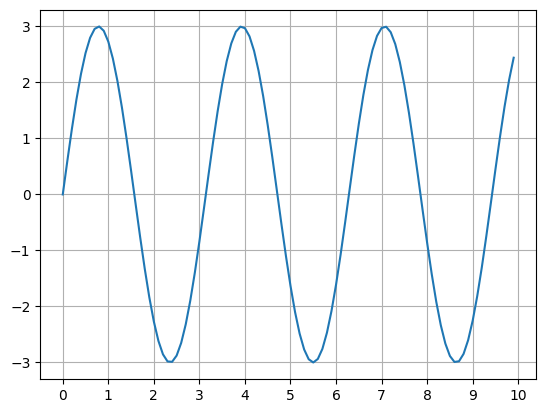

In [78]:
# Plottet die Daten
plt.plot(time,y)

# Integration eines Gitters
plt.grid()

# Änderung von ticks auf der x-Achse, ; verhindert die Ausgabe
plt.xticks(np.arange(0,11,1));

Die Alternative zu `plt` ist natürlich wieder über die `subplots` und `ax` zu arbeiten. Die Dokumentation von `matplotlib` enthält sehr viele Beispiele dazu und kann als Basis verwendet werden um hier für die eigene Visualisierung das Richtige zu finden. 

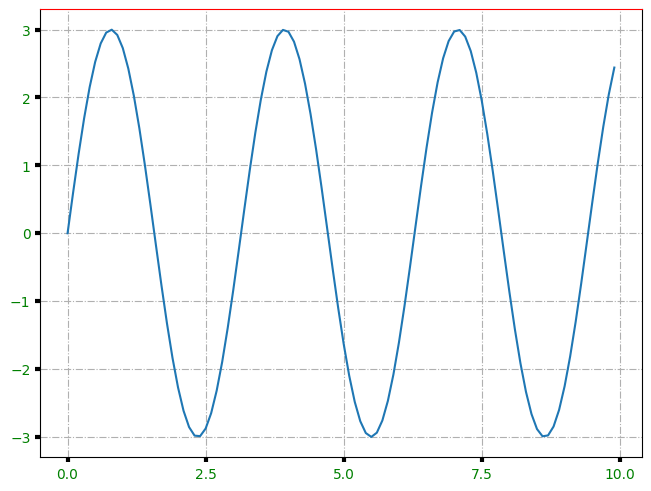

In [79]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(time, y)

# Den Achsen Tick verändern
ax.set_xticks(np.arange(0,11,2.5))

# Die Farbe einens Spines ändern
ax.spines['top'].set_color('red') 

# Den Grid hinzufügen
ax.grid(True, linestyle='-.')

# Die Erscheinung der Ticks ändern
ax.tick_params(labelcolor='green', labelsize='medium', width=3)

### 2.2.1 Umgang mit Datumswerten

Es gibt auch Fälle in denen die x-Achse nicht in Zahlen sondern als Text, Datum oder Rubrik dargestellt wird. Für diese Fälle können die ticks entsprechend mit Bezeichnungen versehen werden. Ein Beispiel hierfür ist unter https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html zu finden

In [80]:
# Quelle matlplotlib.org
import numpy as np
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = np.load('goog.npz')['price_data']

In [81]:
# Print Column Names
print(data.dtype.names)
# Print fist line
print(data[0])

('date', 'open', 'high', 'low', 'close', 'volume', 'adj_close')
('2004-08-19', 100., 104.06, 95.96, 100.34, 22351900, 100.34)


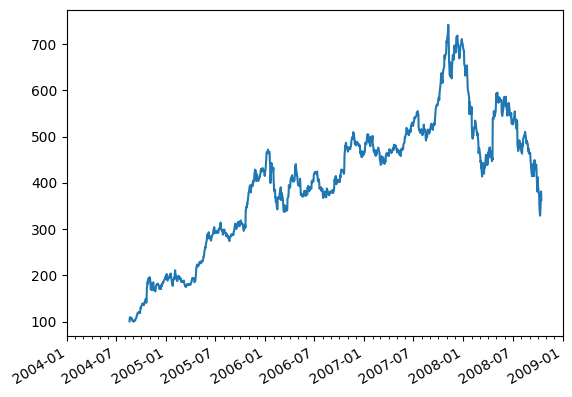

In [82]:
fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years and set axis limits
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

### 2.3. Linestyles und Marker

Da es unzählige Methoden und Möglichkeiten gibt einen plot zu individualisieren ist es in diesem Notebook nicht notwendig all diese aufzuzeigen. Deshalb wird nur noch der Linestyle und die Marker aufgezeigt, da dieser für die meisten plots mit mehreren Linien wichtig ist.

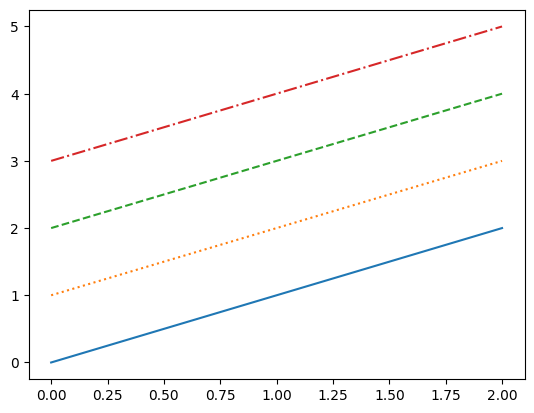

In [83]:
plt.plot([0, 1, 2], linestyle='solid')
plt.plot([1, 2, 3], linestyle='dotted')
plt.plot([2, 3, 4], linestyle='dashed')
plt.plot([3, 4, 5], linestyle='dashdot')

Unter https://matplotlib.org/stable/api/markers_api.html sind alle möglichen Marker zu finden. Der Einfachheit halber wird hier nur ein Kleiner Ausschnitt für die verschiedenen Markertypen gezeigt

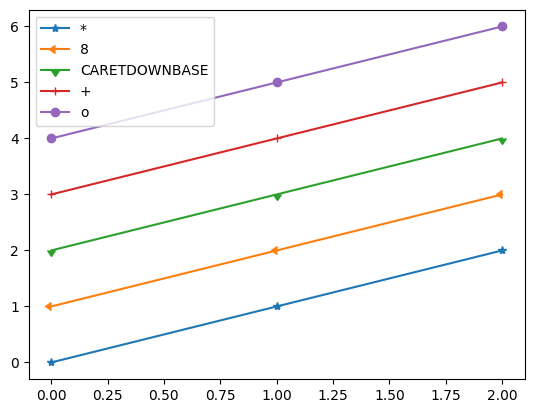

In [84]:
plt.plot([0, 1, 2], marker='*')
plt.plot([1, 2, 3], marker=8)
plt.plot([2, 3, 4], marker=mpl.markers.CARETDOWNBASE)
plt.plot([3, 4, 5], marker='+')
plt.plot([4, 5, 6], marker='o')
plt.legend(['*', '8', 'CARETDOWNBASE', '+', 'o']);

## 3. Unzählige Möglichkeiten

Wie unter https://matplotlib.org/stable/gallery/index.html zu sehen ist gibt es unzählige Beispiele wie Daten visualisiert werden können. Die Fülle der Beispiele zeigt auch die Fülle der Möglichkeiten durch die Bibliothek matplotlib auf. I.d.R. gibt es für jegliche Daten die man darstellen möchte schon ein passendes Beispiel das adaptiert werden muss. Dieser Prozess ist der übliche Weg wenn es darum geht eigene Daten zu visualisieren. Deshalb wird dieser Prozess nun Anhand eines Beispiels durchlaufen. 

---

Für einen IMU ([Inertial Measurement Unit](https://en.wikipedia.org/wiki/Inertial_measurement_unit)) Sensornode wünscht sich der Hersteller eine Application Note (Dokument welches ein Anwendungsbeispiel und i.d.R. best practice aufzeigt). Bisherige Application Note haben Diagramme in dieser Form:

<img src="https://www.mdpi.com/sensors/sensors-20-06722/article_deploy/html/images/sensors-20-06722-g004.png" alt="image info" />

Um konsistent, das gleiche Erscheinungsbild für Diagramme zu haben, ist es der Wunsch des Herstellers, dass auch in dieser Application Note die Diagramm diese Erscheinung haben. Wir verbessern die Darstellung weiter, indem wir die Größen-Zeichen kursiv und die Einheiten aufrecht anzeigen.

Für die Application Note und dem darin aufgezeigten Experiment bestehen folgende Daten:
 - Zeitarray
 - 3 Beschleunigungs-Arrays `a` (x, y, z) in $\text{m/s}^2$
 - 3 Drehrate-Arrays `w` (x, y, z) in $\text{°/s}$
 - 3 Magnetische Flussdichte-Array `B` (x, y, z) in $\text{mT}$


Versuchen Sie die folgenden Ziele zu erreichen:
- Drei Subplots untereinander
- Achsenbeschriftungen korrekt und mit kursiven Größenzeichen und aufrechten Einheiten
- Speichern die Sie die Grafik as pdf-Datei

Zusatz:
- Legende verdeckt keine Kurve
- Legendenhintergrund weiß und nicht mehr transparent
- Gleiche Farbreihenfolge, wie die Vorlage (blau, rot, orange)

In [85]:
# Die dazu gehörigen emulierten Daten
g = 9.81 # Erdbeschleunigung
B_max = 60 # Erdflußdichte
time = np.array(np.arange(0,100,0.1))
a_x = np.random.randn(np.size(time))+time/100*g
a_y = g+np.random.randn(np.size(time))-time/100*g
a_z = np.random.randn(np.size(time))
w_x = np.random.randn(np.size(time))
w_y = np.random.randn(np.size(time))
w_z = np.random.randn(np.size(time))+10
B_x = np.random.randn(np.size(time))
B_y = np.random.randn(np.size(time))-B_max+time/100*B_max
B_z = np.random.randn(np.size(time))+time/100*B_max

Diese Daten können über Subplots und hinzufügen von Legenden und Bezeichnungen erstellt werden. Unter https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py kann ein Beispiel eingesehen werden, welches zwei Subplots erstellt. Für unsere Daten brauchen wir stattdessen drei Subplots untereinander.

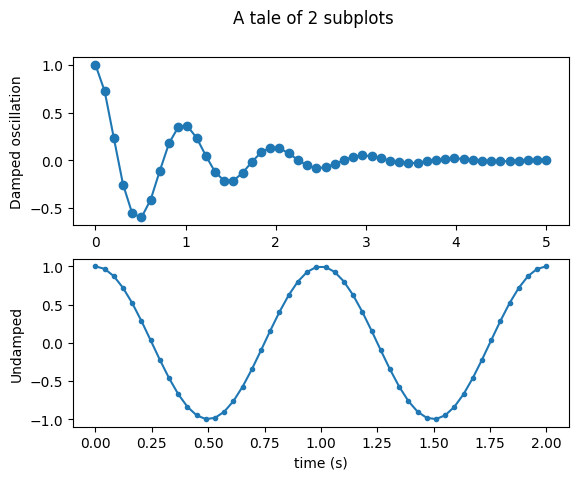

In [86]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

Aus Basis dieses Codes können wir nun das Diagramm für unsere Zwecke erstellen.

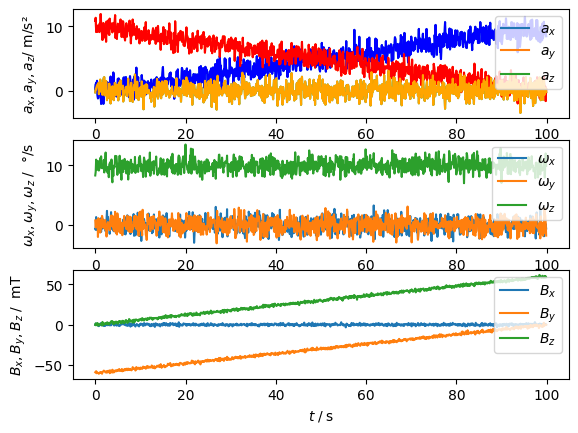

In [87]:
# Lösung Minimal löschen


# Die Emulierten Daten werden auskommentiert oder auch gelöscht

# Um das Diagramm besser zu sehen werden die Darstellungsformen vergrößert
#mpl.rcParams['figure.figsize'] = [7, 12]


# Die Zahl der Subplot wird auf 4 erhöht, dementsprechend wird auch ax3 und ax4 hinzugefügt
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Der Titel des Diagramms wird auch auskommentiert oder auch gelöscht
#fig.suptitle('A tale of 2 subplots')

# Änderung des plot Inhalts und der Achsbezeichnung
ax1.plot(time, a_x, time, a_y, time, a_z)

# Plot the data with default colors (e.g., blue, orange, green)
lines = ax1.plot(time, a_x, time, a_y, time, a_z)

# Change the colors of the lines
lines[0].set_color('blue')   # Change the color of the first line (a_x) to blue
lines[1].set_color('red')    # Change the color of the second line (a_y) to red
lines[2].set_color('orange') # Change the color of the third line (a_z) to orange


ax1.set_ylabel('$a_x, a_y, a_z  /$ m/s²')
ax1.set_xlabel('$t\;/\;$s')
# Hinzufügen der Legende
ax1.legend((['$a_x$', '$a_y$', '$a_z$']),loc=1)

# Änderung des plot Inhalts und der Achsbezeichnung
ax2.plot(time, w_x, time, w_y, time, w_z)
ax2.set_ylabel('$\omega_x, \omega_y, \omega_z  \;$/  °/s')
ax2.set_xlabel('$t\;/\;$s')

# Hinzufügen der Legende
ax2.legend((['$\omega_x$', '$\omega_y$', '$\omega_z$']),loc=1)

# Änderung des plot Inhalts und der Achsbezeichnung
ax3.plot(time, B_x, time, B_y, time, B_z)
ax3.set_ylabel('$B_x, B_y, B_z  \;$/  mT')
ax3.set_xlabel('$t\;/\;$s')

# Hinzufügen der Legende
ax3.legend((['$B_x$', '$B_y$', '$B_z$']),loc=1)


plt.show()

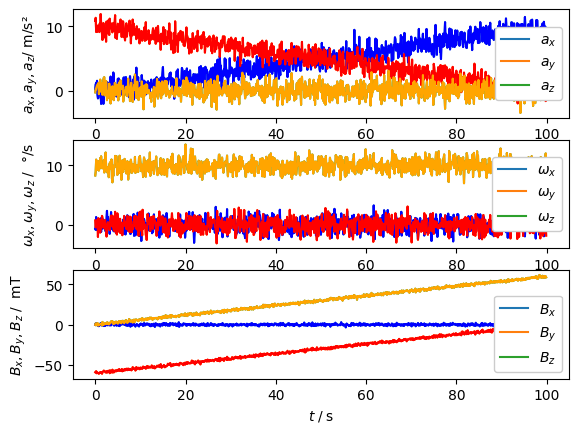

In [88]:
# Lösung Zusatz löschen


# Die Emulierten Daten werden auskommentiert oder auch gelöscht

# Um das Diagramm besser zu sehen werden die Darstellungsformen vergrößert
#mpl.rcParams['figure.figsize'] = [7, 12]


# Die Zahl der Subplot wird auf 4 erhöht, dementsprechend wird auch ax3 und ax4 hinzugefügt
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Der Titel des Diagramms wird auch auskommentiert oder auch gelöscht
#fig.suptitle('A tale of 2 subplots')

# Änderung des plot Inhalts und der Achsbezeichnung
ax1.plot(time, a_x, time, a_y, time, a_z)

# Plot the data with default colors (e.g., blue, orange, green)
lines = ax1.plot(time, a_x, time, a_y, time, a_z)

# Change the colors of the lines
lines[0].set_color('blue')   # Change the color of the first line (a_x) to blue
lines[1].set_color('red')    # Change the color of the second line (a_y) to red
lines[2].set_color('orange') # Change the color of the third line (a_z) to orange



ax1.set_ylabel('$a_x, a_y, a_z  /$ m/s²')
ax1.set_xlabel('$t\;/\;$s')
# Hinzufügen der Legende
ax1.legend((['$a_x$', '$a_y$', '$a_z$']),loc='center right', facecolor = 'white')
ax1.get_legend().get_frame().set_facecolor('white') 
ax1.get_legend().get_frame().set_alpha(1.0)

# Änderung des plot Inhalts und der Achsbezeichnung
ax2.plot(time, w_x, time, w_y, time, w_z)

# Plot the data with default colors (e.g., blue, orange, green)
lines = ax2.plot(time, w_x, time, w_y, time, w_z)

# Change the colors of the lines
lines[0].set_color('blue')   # Change the color of the first line (a_x) to blue
lines[1].set_color('red')    # Change the color of the second line (a_y) to red
lines[2].set_color('orange') # Change the color of the third line (a_z) to orange



ax2.set_ylabel('$\omega_x, \omega_y, \omega_z  \;$/  °/s')
ax2.set_xlabel('$t\;/\;$s')

# Hinzufügen der Legende
ax2.legend((['$\omega_x$', '$\omega_y$', '$\omega_z$']),loc='center right', facecolor = 'white')
ax2.get_legend().get_frame().set_facecolor('white') 
ax2.get_legend().get_frame().set_alpha(1.0)


# Änderung des plot Inhalts und der Achsbezeichnung
ax3.plot(time, B_x, time, B_y, time, B_z)

# Plot the data with default colors (e.g., blue, orange, green)
lines = ax3.plot(time, B_x, time, B_y, time, B_z)

# Change the colors of the lines
lines[0].set_color('blue')   # Change the color of the first line (a_x) to blue
lines[1].set_color('red')    # Change the color of the second line (a_y) to red
lines[2].set_color('orange') # Change the color of the third line (a_z) to orange



ax3.set_ylabel('$B_x, B_y, B_z  \;$/  mT')
ax3.set_xlabel('$t\;/\;$s')

# Hinzufügen der Legende
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax3.legend((['$B_x$', '$B_y$', '$B_z$']),loc='lower right')
ax3.get_legend().get_frame().set_facecolor('white') 
ax3.get_legend().get_frame().set_alpha(1.0)



plt.show()

In [89]:
fig.savefig("test.pdf")